<a href="https://colab.research.google.com/github/veenath09/NLP/blob/main/clotihng_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score
from tensorflow import keras
import tensorflow as tf


In [ ]:
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import files

In [ ]:
test = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [ ]:
!unzip archive(1).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip archive(1).zip'


In [ ]:
path = '/content/Womens Clothing E-Commerce Reviews.csv'
df =  pd.read_csv(path)

In [ ]:
df


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
new_df = df[['Clothing ID','Review Text','Recommended IND']]

In [ ]:
new_df

,Clothing ID,Review Text,Recommended IND
0,767,Absolutely wonderful - silky and sexy and comf...,1
1,1080,Love this dress! it's sooo pretty. i happene...,1
2,1077,I had such high hopes for this dress and reall...,0
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",1
4,847,This shirt is very flattering to all due to th...,1
...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,1
23482,862,"It reminds me of maternity clothes. soft, stre...",1
23483,1104,"This fit well, but the top was very see throug...",0
23484,1084,I bought this dress for a wedding i have this ...,1


In [ ]:
Y = new_df['Recommended IND'].tolist()
test = sum([1 for t in Y if t==1])

In [ ]:
test

19314

<Axes: >

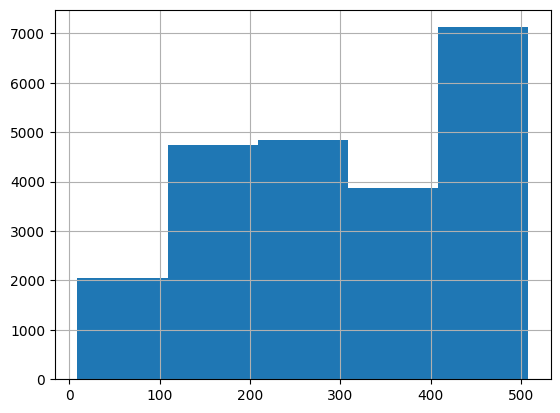

In [ ]:
token_lengths = [len(t) for t in df['Review Text'].tolist() if isinstance(t, str)]
token_lengths = pd.Series(token_lengths)
token_lengths.hist(bins=5)

<Axes: >

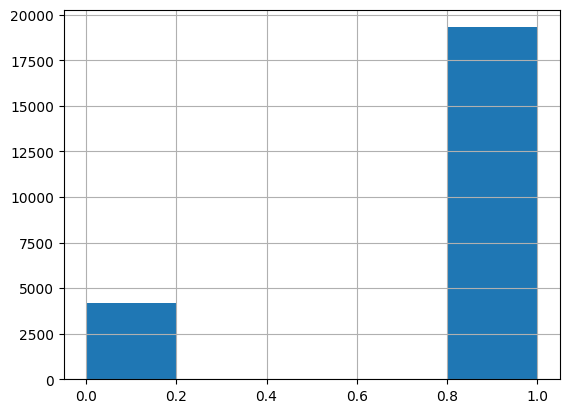

In [ ]:
token_lengths = [t for t in Y]
token_lengths = pd.Series(token_lengths)
token_lengths.hist(bins=5)

In [ ]:
corpus = new_df['Review Text'].tolist()
corpus

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [ ]:
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
tokenizer = RegexpTokenizer(r'[a-z]\w+')

In [ ]:
def preprocess_sentence(sentence):
  if not isinstance(sentence, str):
    return 'diregard'

  sentence = sentence.lower()
  sentence = tokenizer.tokenize(sentence)



  tokens = []

  for token in sentence:
    if token not in stopwords:
      token = lemmatizer.lemmatize(token)
      tokens.append(token)

  return " ".join(tokens)



def preprocess_corpus(corpus):

  preprocessed_corpus = []

  for sentence in corpus:
    sentence = preprocess_sentence(sentence)
    preprocessed_corpus.append(sentence)

  return preprocessed_corpus




In [ ]:
test =preprocess_corpus(corpus)
test

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
 'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt',
 'love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned d

In [ ]:
k_tokenizer = keras.preprocessing.text.Tokenizer()
k_tokenizer.fit_on_texts(test)

In [ ]:
corpus_tokens = k_tokenizer.texts_to_sequences(test)

In [ ]:
vocabulary  = k_tokenizer.word_index


In [ ]:
pad_corpus=tf.keras.utils.pad_sequences(corpus_tokens, padding='post', maxlen=800)

In [ ]:
inputs = keras.layers.Input(800,)
embeddings = keras.layers.Embedding(input_dim=len(vocabulary)+1,output_dim=200)
lstm_layer_01 = keras.layers.Bidirectional(keras.layers.LSTM(128,return_sequences=True))
lstm_layer_02 = keras.layers.Bidirectional(keras.layers.LSTM(64,return_sequences=True))
lstm_layer_03 = keras.layers.Bidirectional(keras.layers.LSTM(64))
dense_layer_01= keras.layers.Dense(128,activation='relu')
dense_layer_02= keras.layers.Dense(128,activation='relu')
output_layer = keras.layers.Dense(1,activation='sigmoid')

In [ ]:
x= embeddings(inputs)
x= lstm_layer_01(x)
x= lstm_layer_02(x)
x= lstm_layer_03(x)
x=dense_layer_01(x)
x=dense_layer_02(x)
outputs=output_layer(x)

model =keras.models.Model(
                    inputs,
                    outputs
)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 800)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 800, 200)          2433000   
                                                                 
 bidirectional_13 (Bidirect  (None, 800, 256)          336896    
 ional)                                                          
                                                                 
 bidirectional_14 (Bidirect  (None, 800, 128)          164352    
 ional)                                                          
                                                                 
 bidirectional_15 (Bidirect  (None, 128)               98816     
 ional)                                                          
                                                           

In [ ]:
model.compile(
                loss= 'binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
)
model.fit(
          pad_corpus,
          np.array(Y),
          batch_size = 12,
          epochs = 10
          )

Epoch 1/10
1958/1958 [==============================] - 285s 140ms/step - loss: 0.0624 - accuracy: 0.9780
Epoch 2/10
1958/1958 [==============================] - 262s 134ms/step - loss: 0.0470 - accuracy: 0.9843
Epoch 3/10
1958/1958 [==============================] - 261s 133ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 4/10
1958/1958 [==============================] - 265s 135ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 5/10
1958/1958 [==============================] - 263s 134ms/step - loss: 0.0276 - accuracy: 0.9914
Epoch 6/10
1958/1958 [==============================] - 265s 135ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 7/10
1958/1958 [==============================] - 264s 135ms/step - loss: 0.0234 - accuracy: 0.9931
Epoch 8/10
1958/1958 [==============================] - 262s 134ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 9/10
1958/1958 [==============================] - 260s 133ms/step - loss: 0.0192 - accuracy: 0.9944
Epoch 10/10
1958/1958 [=======================

In [ ]:
def make_pred(sen):
  sen_tokens = k_tokenizer.texts_to_sequences([sen])
  sen_padded = tf.keras.utils.pad_sequences(
                                              sen_tokens,
                                              padding='post',
                                              maxlen=800
                                              )
  p = float(model.predict(sen_padded).squeeze())
  p = "Negative" if p < 0.5 else "Positive"
  return p

In [ ]:
make_pred("""First of all, this is not pullover styling. there is a side zipper. i wouldn't have purchased it if i knew there was a side zipper because i have a large bust and side zippers are next to impossible for me.

second of all, the tulle feels and looks cheap and the slip has an awkward tight shape underneath.

not at all what is looks like or is described as. sadly will be returning, but i'm sure i will find something to exchange it for!""")

1/1 [==============================] - 0s 100ms/step


'Negative'